# Machine Learning Algorithm - Gradient Descent Algorithm

###### Import all relevant libraries

In [1]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns

###### Load the csv file to data-frame

In [2]:
sales_df = pd.read_csv('./DataSet/Advertising.csv')

###### Checking if data-frame loaded properly

In [3]:
sales_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
sales_df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


###### Defining X and Y 

In [5]:
X = sales_df[['TV','Radio','Newspaper']]
Y = sales_df['Sales']

###### Standardise the data

In [6]:
Y = np.array((Y-Y.mean())/Y.std())
X = X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0) #axis=0 -> It is applied to all the rows

In [7]:
X

,TV,Radio,Newspaper
0,0.967425,0.979066,1.774493
1,-1.194379,1.080097,0.667903
2,-1.512360,1.524637,1.779084
3,0.051919,1.214806,1.283185
4,0.393196,-0.839507,1.278593
...,...,...,...
195,-1.267759,-1.317724,-0.769287
196,-0.615491,-1.236899,-1.031011
197,0.348934,-0.940539,-1.109069
198,1.590574,1.261955,1.636743


In [8]:
Y

array([ 1.54816813, -0.69430382, -0.90513451,  0.85817677, -0.21514314,
       -1.30762948, -0.42597384, -0.15764386, -1.76762372, -0.65597096,
       -1.0392995 ,  0.64734607, -0.92430094, -0.8284688 ,  0.9540089 ,
        1.60566742, -0.29180885,  1.98899595, -0.52180597,  0.11068612,
        0.76234463, -0.29180885, -1.61429231,  0.28318396, -0.8284688 ,
       -0.38764098,  0.18735182,  0.35984967,  0.93484247, -0.67513739,
        1.41400315, -0.40680741, -0.84763523,  0.64734607, -0.86680166,
       -0.23430957,  2.18066022,  0.12985254, -0.7518031 ,  1.43316957,
        0.49401465,  0.58984679,  1.27983816, -0.21514314, -1.05846593,
        0.1681854 , -0.65597096,  1.75899883,  0.14901897, -0.8284688 ,
       -0.50263955, -0.63680453,  1.64400027,  1.37567029,  1.18400602,
        1.85483097, -1.63345873, -0.15764386,  1.87399739,  0.83901034,
       -1.13513163,  1.9506631 ,  0.32151681, -0.00431245,  0.76234463,
       -0.90513451, -0.86680166, -0.11931101,  0.93484247,  1.58

###### Initialisation of beta0,beta1,beta2 & beta3

In [9]:
def initialize(dim):
    np.random.seed(seed=42)
    random.seed(42)
    b = random.random()   #b -> beta0 (bias)
    w = np.random.rand(dim)     #weights
    return b,w   #return bias & weight

In [10]:
b,w = initialize(3)
print('Bias = ',b,'\nWeights = ',w)

Bias =  0.6394267984578837 
Weights =  [0.37454012 0.95071431 0.73199394]


###### Now we predict the value of Y

In [11]:
def predict_Y(b,w,x):
    return b + np.matmul(x,w)

In [12]:
# First Initialise and then predict
b,w = initialize(3)
y_hat = predict_Y(b,w,X)
y_hat[0:20]

0     3.231496
1     1.707849
2     2.824761
3     2.753090
4     0.924486
5     3.171365
6     0.622344
7    -0.349354
8    -2.313095
9    -0.768030
10   -1.045554
11    0.089216
12    2.047700
13   -1.364689
14    2.024532
15    3.166208
16    3.952376
17    3.120172
18   -0.289020
19    0.296300
dtype: float64

###### Calculating Mean-Square Error

In [13]:
def get_cost(Y,Y_hat):
    Y_resid = Y - Y_hat    #Calculating Residual value of Y
    return np.sum(np.matmul(Y_resid.T,Y_resid))/len(Y_resid)  # .T is transpose

In [14]:
b,w = initialize(3)
y_hat = predict_Y(b,w,X)
get_cost(Y,y_hat)

1.5303100198505895

In [15]:
# Update beta0 & beta1
def update_beta(x, y, y_hat, b_0, w_0, learning_rate):
    db = (np.sum(y_hat-y)*2)/len(y)
    dw = (np.dot(y_hat-y,x)*2)/len(y)
    b_1 = b_0 - learning_rate*db
    w_1 = w_0 - learning_rate*dw
    return b_1, w_1

In [16]:
b,w = initialize(3)
print('After Initialization \n Bias',b,'\nWeight: ',w)
y_hat = predict_Y(b,w,X)
b,w = update_beta(X, Y, y_hat, b, w, 0.01)
print('\nAfter First Update \n Bias',b,'\nWeights: ',w)
#get_cost(Y,y_hat)

After Initialization 
 Bias 0.6394267984578837 
Weight:  [0.37454012 0.95071431 0.73199394]

After First Update 
 Bias 0.6266382624887261 
Weights:  [0.38079093 0.9376953  0.71484883]


###### Function to execute Gradient Descent Algorithm

In [17]:
def run_gradient_descent(X,Y,alpha=0.01,num_iterations=100):     # alpha is Learning rate
    b,w = initialize(X.shape[1])   
    # we pass dimension of X as argument
    # X.shape[0] -> Rows of X
    # X.shape[1] -> Columns of X
    
    iter_num = 0
    gd_iterrations_df = pd.DataFrame(columns=['iterations','cost'])
    result_idx = 0
    for each_iter in range(num_iterations):
        y_hat = predict_Y(b,w,X)
        this_cost = get_cost(Y,y_hat)
        prev_b = b
        prev_w = w
        b,w = update_beta(X, Y, y_hat, prev_b, prev_w, alpha)
        
        if(iter_num%10==0):    # after every 10 iteration it stores the information
            gd_iterrations_df.loc[result_idx] = [iter_num, this_cost]
            result_idx = result_idx + 1
        iter_num = iter_num + 1
    print("Final Estimate of b is {} \n w is {} ".format(b,w))
    return gd_iterrations_df, b, w

In [18]:
gid, b , w = run_gradient_descent(X, Y, alpha=0.001, num_iterations=200)

Final Estimate of b is 0.42844895817391493 
 w is [0.48270238 0.75265969 0.46109174] 


###### Print first 20 values to see the result

In [19]:
# Print first 10 values
gid.head(20)

,iterations,cost
0,0.0,1.530310
1,10.0,1.465201
2,20.0,1.403145
3,30.0,1.343996
4,40.0,1.287615
5,50.0,1.233868
6,60.0,1.182630
7,70.0,1.133780
8,80.0,1.087203
9,90.0,1.042793


###### Visualising Algorithm

In [20]:
%matplotlib inline

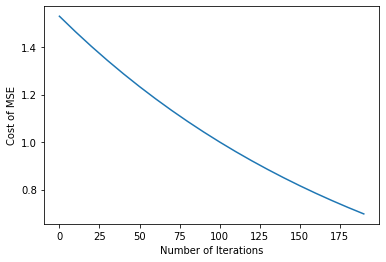

In [21]:
plt.plot(gid['iterations'],gid['cost'])
plt.xlabel('Number of Iterations')
plt.ylabel('Cost of MSE')
plt.show()

###### Now experimenting with different learning rate & number of iterations

In [22]:
alpha_df_1, b, w = run_gradient_descent(X, Y, alpha=0.01, num_iterations=2000)

Final Estimate of b is 2.774489385785389e-16 
 w is [ 0.75306591  0.53648155 -0.00433069] 


In [23]:
alpha_df_2, b, w = run_gradient_descent(X, Y, alpha=0.001, num_iterations=2000)

Final Estimate of b is 0.011664695556930518 
 w is [0.74315125 0.52779959 0.01171703] 


Text(0.5, 1.0, 'Cost VS Iterations for different Learning Rate')

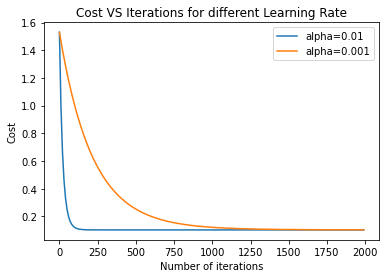

In [24]:
plt.plot(alpha_df_1['iterations'],alpha_df_1['cost'],label='alpha=0.01')
plt.plot(alpha_df_2['iterations'],alpha_df_2['cost'],label='alpha=0.001')
plt.legend()  # Library function used to give label at right top of the graph
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('Cost VS Iterations for different Learning Rate')